**ML Lab**

**Experiment- 1**

Sahdeep Singh (23/CS/355)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['class'] = df['target'].apply(lambda x: iris.target_names[x])

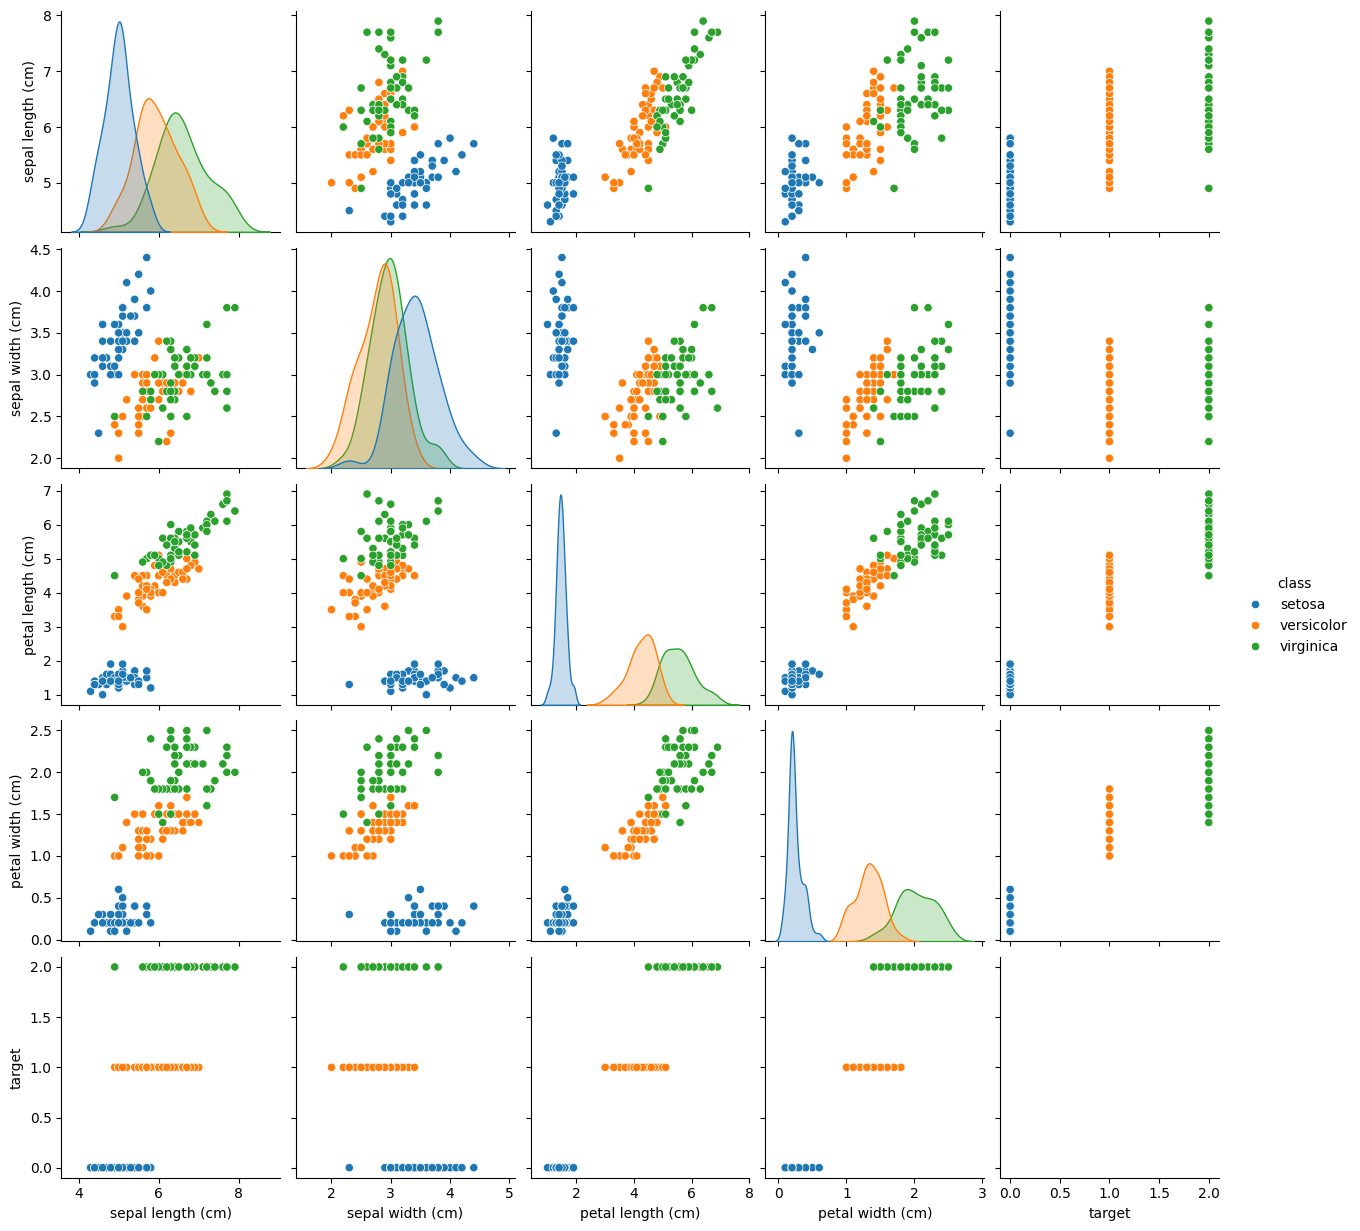

In [14]:
sns.pairplot(df, hue='class')
plt.show()

### Observations from Data Visualization

The `seaborn.pairplot` provides valuable insights into the Iris dataset:

* **Distinct Clusters:** We can clearly see that the three Iris species form separate clusters based on their feature measurements.
* **Easy Separation:** The 'Iris-setosa' species (blue dots) is particularly easy to distinguish. Its petal length and petal width measurements are significantly smaller than the other two species.
* **Slight Overlap:** There is some overlap between 'Iris-versicolor' (orange dots) and 'Iris-virginica' (green dots), especially in the sepal dimensions. However, using a combination of features like petal length and petal width still allows for strong separation.

In [15]:
X = df[iris.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
for k in [1, 3, 5, 7]:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f'k={k}, Accuracy: {acc:.2f}')

k=1, Accuracy: 1.00
k=3, Accuracy: 1.00
k=5, Accuracy: 1.00
k=7, Accuracy: 0.97


### Model Performance Summary

Our KNN classifier achieved a accuracy of **1.00** on the test set for most of the tested 'k' values.

This high performance is expected because the Iris dataset is considered a "toy" or benchmark dataset in machine learning. The different species, especially when considering petal length and petal width, are well-separated, which makes it an ideal problem for a simple, distance-based algorithm like KNN to solve with high accuracy. The clear separation of the data points makes it easy for the model to find the correct nearest neighbors and make accurate classifications.

### Discussion: KNN and Vector Distance

The K-Nearest Neighbors (KNN) algorithm is a distance-based classifier. It operates on the principle that data points that are close to each other in a multi-dimensional space are likely to belong to the same class.

The "distance" is most commonly calculated using the **Euclidean distance**, which is a straight-line measurement between two points. In our case, for each new flower to be classified, the model calculates its Euclidean distance from every flower in the training dataset using all four of its features (sepal length, sepal width, petal length, and petal width).

The model then identifies the `k` data points with the shortest distances. The new flower is assigned the class that is most common among its `k` nearest neighbors. This process is repeated for every data point in the test set to generate the predictions.